In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix  

In [45]:
df = pd.read_csv('disease.csv')

df

,Blood Pressure,Fever,Diabetes,Vomit,Has Disease?
0,high,high,yes,no,no
1,high,high,yes,yes,no
2,low,mild,no,yes,yes
3,high,no fever,yes,no,no
4,low,no fever,no,no,yes
...,...,...,...,...,...
194,high,high,no,yes,yes
195,normal,mild,yes,yes,no
196,high,high,yes,no,no
197,high,high,yes,yes,no


## Describe the Test Dataset

- The dataset is a test/sample dataset to identify if an individual has a disease or not based on these variables; Blood Pressure, Fever, Diabetes, Vomit



Text(0, 0.5, '')

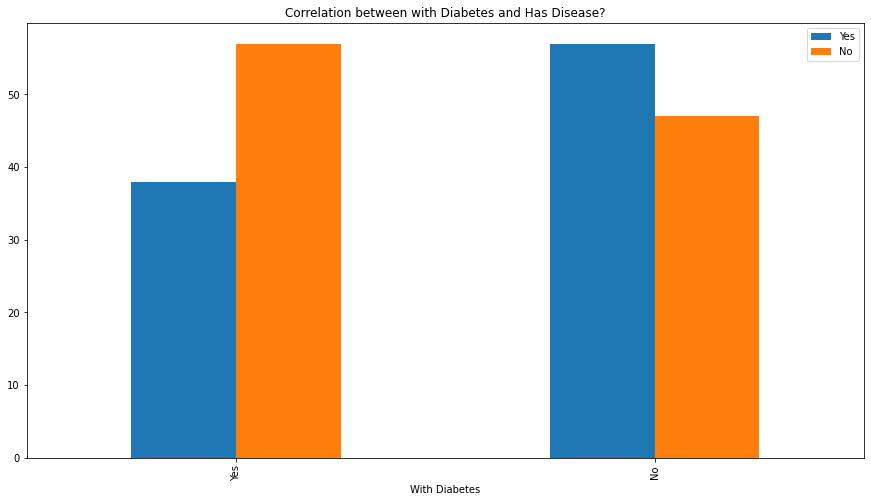

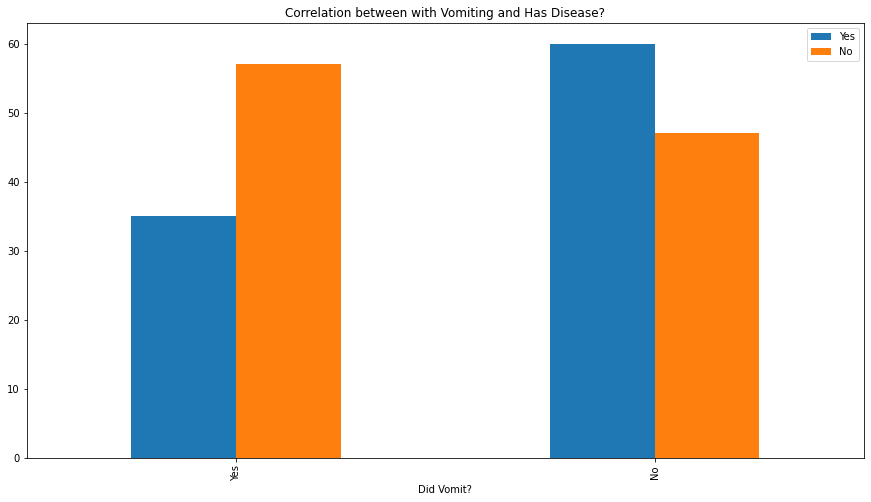

In [39]:
# get count

bpHYes = 0
bpNYes = 0
bpLYes = 0
bpHNo = 0
bpNNo = 0
bpLNo = 0

fvHYes = 0
fvMYes = 0
fvNYes = 0
fvHNo = 0
fvMNo = 0
fvNNo = 0

dbYYes = 0
dbNYes = 0
dbYNo = 0
dbNNo = 0

vmYYes = 0
vmNYes = 0
vmYNo = 0
vmNNo = 0


for index, row in df.iterrows():
    bp = row["Blood Pressure"]
    fv = row["Fever"]
    db = row["Diabetes"]
    vm = row["Vomit"]
    hd = row["Has Disease?"]
    
    # Blood pressure
    if bp == 'high' and hd == 'yes':
        bpHYes += 1
        
    if bp == 'normal' and hd == 'yes':
        bpNYes += 1
        
    if bp == 'low' and hd == 'yes':
        bpLYes += 1

    if bp == 'high' and hd == 'no':
        bpHNo += 1
        
    if bp == 'normal' and hd == 'no':
        bpNNo += 1
        
    if bp == 'low' and hd == 'no':
        bpLNo += 1


    # Fever
    if fv == 'high' and hd == 'yes':
        fvHYes += 1
        
    if fv == 'mild' and hd == 'yes':
        fvMYes += 1
        
    if fv == 'no fever' and hd == 'yes':
        fvNYes += 1

    if fv == 'high' and hd == 'no':
        fvHNo += 1
        
    if fv == 'mild' and hd == 'no':
        fvMNo += 1
        
    if fv == 'no fever' and hd == 'no':
        fvNNo += 1
        
    # Diabetes
    if db == 'yes' and hd == 'yes':
        dbYYes += 1
        
    if db == 'no' and hd == 'yes':
        dbNYes += 1

    if db == 'yes' and hd == 'no':
        dbYNo += 1
        
    if db == 'no' and hd == 'no':
        dbNNo += 1
    
    # Vomit
    if vm == 'yes' and hd == 'yes':
        vmYYes += 1
        
    if vm == 'no' and hd == 'yes':
        vmNYes += 1

    if vm == 'yes' and hd == 'no':
        vmYNo += 1
        
    if vm == 'no' and hd == 'no':
        vmNNo += 1
        
        

# plotdata = pd.DataFrame({
#     "Yes":[bpLYes,bpNYes,bpHYes],
#     "No":[bpLNo,bpNNo,bpHNo],
#     },

#     index=["Low", "Normal", "High"])

# plotdata.plot(kind="bar",figsize=(15, 8))


# plt.title("Correlation between Blood Pressure and Has Disease?")

# plt.xlabel("Blood Pressure")

# plt.ylabel("")

# plotdata = pd.DataFrame({
#     "Yes":[fvNYes,fvMYes,fvHYes],
#     "No":[fvNNo,fvMNo,fvHNo],
#     },

#     index=["No Fever", "Mild", "High"])

# plotdata.plot(kind="bar",figsize=(15, 8))

# plt.title("Correlation between Fever and Has Disease?")

# plt.xlabel("Fever")

# plt.ylabel("")


plotdata = pd.DataFrame({
    "Yes":[dbYYes,dbNYes],
    "No": [dbYNo,dbNNo],
    },

    index=["Yes", "No"])


plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Correlation between with Diabetes and Has Disease?")

plt.xlabel("With Diabetes")

plt.ylabel("")


plotdata = pd.DataFrame({
    "Yes":[vmYYes,vmNYes],
    "No": [vmYNo,vmNNo],
    },

    index=["Yes", "No"])


plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Correlation between with Vomiting and Has Disease?")

plt.xlabel("Did Vomit?")

plt.ylabel("")

In [12]:
# Identify the columns/features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Blood Pressure  199 non-null    object
 1   Fever           199 non-null    object
 2   Diabetes        199 non-null    object
 3   Vomit           199 non-null    object
 4   Has Disease?    199 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


In [13]:
# Describe the current dataset
df.describe()

,Blood Pressure,Fever,Diabetes,Vomit,Has Disease?
count,199,199,199,199,199
unique,3,3,2,2,2
top,high,mild,no,no,no
freq,74,82,104,107,104


## Building the Model

In order for us to know if an individual has a disease or not, first we need to come up with a model to help us classify based on our test datasets. In this writing let's use Gaussian Naive-Bayes and try to predict sample datasets later on.


## Gaussian Naive-Bayes Algorithm

In [14]:
# First we need to transform the data
# We will assign a numrical equivalent for the columns

# Blood Pressure
# low = 1
# normal = 2
# high = 3

# Fever
# no fever = 1
# mild = 2
# high = 3

# Diabetes & Vomit
# No = 1
# Yes = 2

# Transform the data

df["Blood Pressure"]  = np.where(df["Blood Pressure"] == "low", 1, 
                                 (np.where(df["Blood Pressure"] == "normal", 2, 3)))
df["Fever"]  = np.where(df["Fever"] == "no fever", 1, (np.where(df["Fever"] == "mild", 2, 3)))
df["Diabetes"]  = np.where(df["Diabetes"] == "no", 1, 2)
df["Vomit"]  = np.where(df["Vomit"] == "no", 1, 2)

# Build the Model
Features = df.drop(['Has Disease?'], axis=1)
Targets = df['Has Disease?']


# Split the dataset into train and test dataset as 4:1 ratio
# or 80% for train and 20% for test datasets
Features_train, Targets_train = Features[0:160], Targets[0:160]
Features_test, Targets_test = Features[160:], Targets[160:]

# Build the Model
model = GaussianNB()
model.fit(Features_train,Targets_train)

# Estimate Error
accuracy = model.score(Features_test,Targets_test)
print("The Gaussian Naive Bayes Model has ", str(round(accuracy * 100, 2)), "% in accuracy prediction")

The Gaussian Naive Bayes Model has  82.05 % in accuracy prediction


In [43]:

y_pred = model.predict(Features_test)  

cm = confusion_matrix(Targets_test, y_pred)  

print(cm)  

[[22  4]
 [ 3 10]]


In [44]:
# Estimate Error
accuracy = model.score(Features_test,Targets_test)
print("The Gaussian Naive Bayes Model has ", str(round(accuracy * 100, 2)), "% in accuracy prediction")

The Gaussian Naive Bayes Model has  82.05 % in accuracy prediction
